# Sentiment Analysis using NLP with Logistic Regression and Naive Bayes algorithms and checking which algorithm has greater accuracy

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# importing dataset
data = pd.read_csv("Reviews.csv")

df= pd.DataFrame(data)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# removing rows with score == 3
df1 = df[df.Score != 3]
(df1.shape)

(525814, 10)

In [5]:
# modifying the SCORE column with 0 for negative if (score < 3) and 1 for positive sentiment if (score > 3)

df1['Score']=df1['Score'].apply(lambda x: 1 if (x > 3)  else 0)
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# removing the rows if there is any NULL value and doing the same operation as previous one

df8 = data[pd.notnull(data.Summary)]
df8['Score']=df8['Score'].apply(lambda x: 1 if (x > 3)  else 0)
print (df8.shape)
df8.head()

(568427, 10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
X = df8.Summary+df8.Text  # joining the SUMMARY and TEXT column for getting greater accuracy
y = df8.Score
print(X.shape)
print(y.shape)

(568427,)
(568427,)


In [10]:
# from sklearn.cross_validation import train_test_split
# splitting the total dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426320,)
(142107,)
(426320,)
(142107,)


In [12]:
# vectoriing the training and test to SPARSE MATRIX for feeding into the model for training

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<426320x178081 sparse matrix of type '<class 'numpy.int64'>'
	with 23802258 stored elements in Compressed Sparse Row format>

In [14]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<142107x178081 sparse matrix of type '<class 'numpy.int64'>'
	with 7906238 stored elements in Compressed Sparse Row format>

In [16]:
# Training the Multinomial Naive bayes model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

%time nb.fit(X_train_dtm, y_train)

Wall time: 344 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# testing the trained model with test set

y_pred_class = nb.predict(X_test_dtm)

In [18]:
# printing the confusion matrix and plotting confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn import metrics
gb=metrics.confusion_matrix(y_test, y_pred_class)
print(gb)

[[ 24194   6876]
 [  7598 103439]]


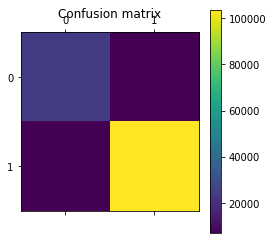

In [19]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import pylab as pl
pl.matshow(gb)
# cm = metrics.confusion_matrix(y_test, y_pred_class, labels=['FAKE', 'REAL'])
pl.title('Confusion matrix')
pl.colorbar()
pl.show()

In [24]:
# calculating R2 score (accuracy)

print(nb.score(X_test_dtm,y_test))

0.8981471707938384


In [26]:
# Same as Naive Bayes this is Logistic Regression model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

%time logreg.fit(X_train_dtm, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 6min 56s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y1_pred_class = logreg.predict(X_test_dtm)

In [28]:
cm= metrics.confusion_matrix(y_test, y1_pred_class)
cm

array([[ 24577,   6493],
       [  3951, 107086]], dtype=int64)

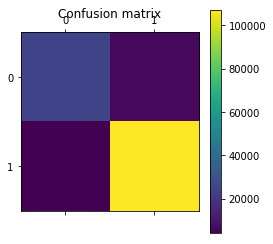

In [29]:
import pylab as pl
pl.matshow(cm)
pl.title('Confusion matrix')
pl.colorbar()
pl.show()

In [30]:
# R2 score for LR model

print(logreg.score(X_test_dtm,y_test))

0.9265060834441653


So we can see that accuracy of Logistic Regression is greater than Naive Bayes

Logistic Regression --> 92.65 %

Naive Bayes --> 89.82 %